In [40]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Union

Get stock data from yahoo finance library

In [41]:
def get_stock(stock_symbol, start, end):
  stock_data = yf.download(stock_symbol, start=start, end=end)
  # print(stock_data)
  stock_data['Daily return'] = stock_data['Close'].pct_change()
  # drop NaN in daily return
  stock_data = stock_data.dropna()

  # expect return
  # expect_return = stock_data['Daily return'].mean()
  return stock_data

In [42]:
stock_data = get_stock('AAPL', start='2020-01-01', end='2025-01-01')
stock_data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,Daily return
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2020-01-03,72.009117,72.771745,71.783962,71.941328,146322800,-0.009722
2020-01-06,72.582916,72.621654,70.876083,71.127873,118387200,0.007968
2020-01-07,72.241554,72.849231,72.021238,72.592601,108872000,-0.004703
2020-01-08,73.403641,73.706271,71.943751,71.943751,132079200,0.016086
2020-01-09,74.962799,75.156480,74.132383,74.384166,170108400,0.021241
...,...,...,...,...,...,...
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700,0.011478
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100,0.003176


In [43]:
p_win = 0
for ret in stock_data['Daily return']:
  if ret > 0: p_win += 1

p_win /= len(stock_data['Daily return'])
p_loss = 1 - p_win
print(p_win, p_loss)

0.5330151153540175 0.46698488464598253


Plot for price change

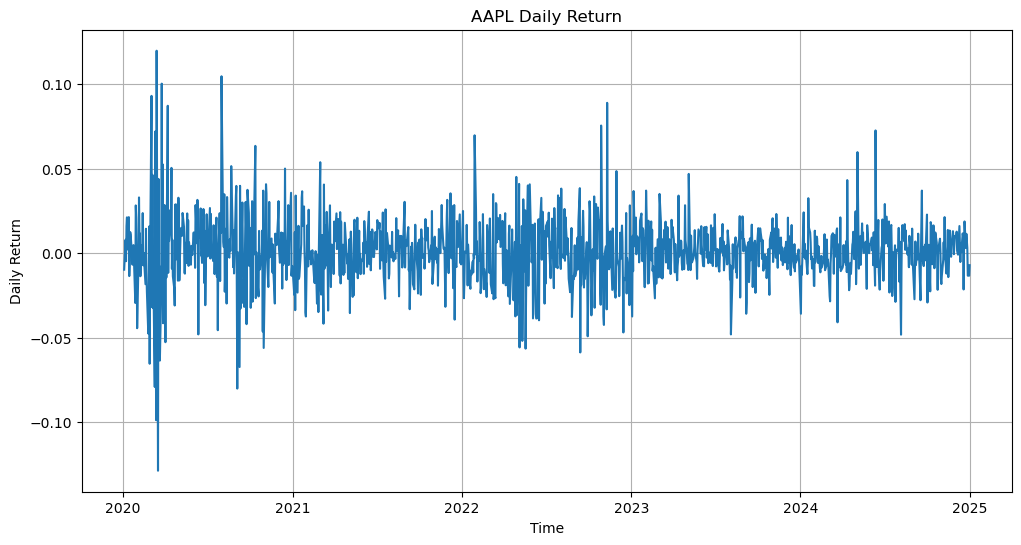

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Daily return'])
plt.xlabel('Time')
plt.ylabel('Daily Return')
plt.title('AAPL Daily Return')
plt.grid(True)
plt.show()

In [ ]:
# Step 3: Define the rolling window for Kelly computation
# new

import itertools


def kelly_fraction(stocks):
    window = 300  # 300-day rolling window
    rf_annual = 0.02  # Assume 2% annual risk-free rate
    rf_daily = (1 + rf_annual) ** (1/252) - 1  # Convert to daily
    cov_matrix = stock_data['Daily return'].cov() * window
    mu = stock_data['Daily return'].mean()

    # Step 5: Compute excess returns
    excess_returns = mu - rf_annual

    # Step 6: Compute Kelly fraction using the inverse of covariance matrix
    kelly_fraction = np.linalg.inv(cov_matrix) @ excess_returns

    # Step 7: Normalize Kelly fractions (sum ≤ 1 for practical investing)
    kelly_fraction = kelly_fraction / np.sum(abs(kelly_fraction))

    # Step 8: Display results
    kelly_df = pd.DataFrame(kelly_fraction, index=stocks, columns=["Kelly Fraction"])
    return kelly_df

kelly_fraction(["AAPL"])
# Step 6: Display last few Kelly values
# print(stock_data[["Kelly_Fraction"]].dropna().tail(10))

TypeError: Series.cov() missing 1 required positional argument: 'other'